## Деликатный Арсений Михайлович

# Курсовая работа по теме «Обработка и визуализация данных на примере датасета "Сервисы по оценке фильмов"»

Цель: Целью данного курсового проекта является обработка и визуализация данных на примере данных о сервисах по оценке фильмов

# ЧАСТЬ 1. ОБЗОР НАБОРА ДАННЫХ.

### Набор данных.

**dataset.csv** - представляет собой набор данных, содержащий информацию о фильме и о его оценках на популярных международных сервисов.

Датасет был собран из множества других датасетов опубликованных в общий доступ, были отобраны те фильмы, информация о рейтингах которых была представлена сразу на всех указанных сервисах, а затем такие данные были сгруппированы в один датасет.

В данном датасете представлена информация об оценках пользователей следующих ресурсов:
- **Internet Movie Database** — веб-сайт со свободно редактируемой и крупнейшей в мире базой данных о кинематографе.
- **Rotten Tomatoes** — сайт-агрегатор рецензий, на котором собирают обзоры фильмов и сериалов из различных изданий, информацию о фильмах и новости кинематографа. 
- **Metacritic** — англоязычный сайт-агрегатор, собирающий отзывы о музыкальных альбомах, играх, фильмах, телевизионных шоу, DVD-дисках и мобильных играх.

-----

Файл **dataset.csv** содержит в себе следующую информацию:



Столбец | Описание
--- | -----------
Movie Name | Название фильма
IMDB Rating | Оценка пользователей сервиса "IMDB" для данного фильма
Rotten Tomatoes Users | Оценки пользователей сервиса "Rotten Tomatoes" для данного фильма
Rotten Tomatoes Critics | Оценка кинокритиков сервиса "Rotten Tomatoes" для данного фильма
Metacritic Users | Оценка пользователей сервиса "Metacritic" для данного фильма
Metacritic Critics | Оценка кинокритиков сервиса "Metacritic" для данного фильма

Импортируем необходимые для работы библиотеки.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Выполним загрузку датасета, для дальнейшей работы с ним.

In [17]:
dataset = pd.read_csv("./datasets/dataset.csv")

Выведем несколько первых строк, а также общую информацию о наборе данных.

In [18]:
dataset.head()

,Movie Name,IMDB Rating,Rotten Tomatoes Users,Rotten Tomatoes Critics,Metacritic Users,Metacritic Critics
0,Touch of Evil,8.0,9.2,9.5,8.4,9.9
1,Seven Samurai,8.6,9.7,10.0,8.8,9.8
2,Pan's Labyrinth,8.2,9.1,9.5,8.6,9.8
3,Some Like It Hot,6.6,9.4,9.4,8.3,9.8
4,North by Northwest,8.3,9.4,9.7,8.0,9.8


Выведем информацию о количестве записей, а также о типах столбцов

In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4139 entries, 0 to 4138
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Movie Name               4139 non-null   object 
 1   IMDB Rating              4139 non-null   float64
 2   Rotten Tomatoes Users    4139 non-null   float64
 3   Rotten Tomatoes Critics  4139 non-null   float64
 4   Metacritic Users         4111 non-null   float64
 5   Metacritic Critics       4139 non-null   float64
dtypes: float64(5), object(1)
memory usage: 194.1+ KB


# ЧАСТЬ 2. ИССЛЕДОВАНИЕ СЕРВИСОВ

## Рейтинги сервиса Rotten Tomatoes.

Датасет содержит следующий набор данных от данного сервиса:
- Rotten Tomatoes Users - оценки пользователей.
- Rotten Tomatoes Critics - оценки критиков.

Изучим, как соотносятся между собой оценки полученный от обычных пользователей и оценки полученные от критиков. Проверим, согласны ли они друг с другом?

График scatterplot, изображающий для Rotten Tomatoes связь между рейтингами от критиков и пользовательскими рейтингами:

([<matplotlib.axis.YTick at 0x170ceea2770>,
 [Text(0, 0, '0'),
  Text(0, 1, '1'),
  Text(0, 2, '2'),
  Text(0, 3, '3'),
  Text(0, 4, '4'),
  Text(0, 5, '5'),
  Text(0, 6, '6'),
  Text(0, 7, '7'),
  Text(0, 8, '8'),
  Text(0, 9, '9'),
  Text(0, 10, '10')])

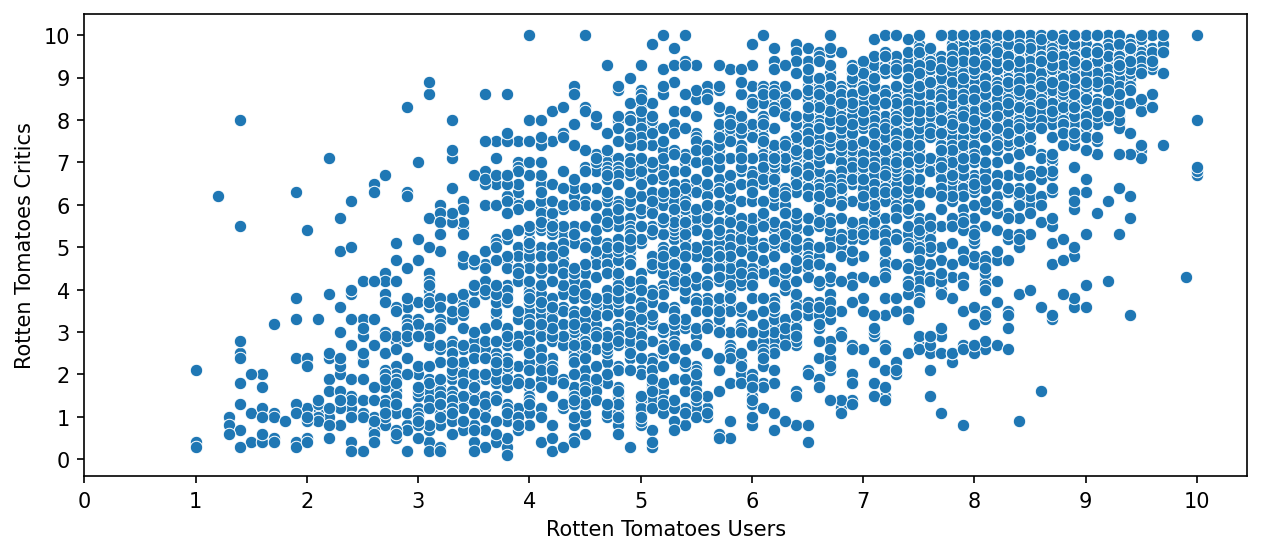

In [21]:
plt.figure(figsize=(10, 4), dpi=150)
sns.scatterplot(data=dataset, x='Rotten Tomatoes Users', y='Rotten Tomatoes Critics')

plt.xticks(range(11))
plt.yticks(range(11))

Как видно из графика выше, можно заметить, что расхождения в оценке многих фильмов довольно существенны!

Для того, чтобы более подробно изучить связь между рейтингами пользователей и критиков, вычислим разницу оценок. На основании этого, если:
- Значение положительное - критики оценили фильм лучше.
- Значение отрицательное - пользователи оценили фильм лучше.

In [22]:
dataset['Rotten Tomatoes Rating Difference']  = dataset['Rotten Tomatoes Critics'] - dataset['Rotten Tomatoes Users']

Вычислим среднюю разницу между оценками.

In [23]:
dataset['Rotten Tomatoes Rating Difference'].mean()

-0.2747765160666827

Нарисуем график распределения разницы между рейтингами от критиков и пользователей для Rotten Tomatoes. Для этого используем KDE и гистограмму.

Text(0.5, 1.0, 'Разница оценок критиков и пользователей')

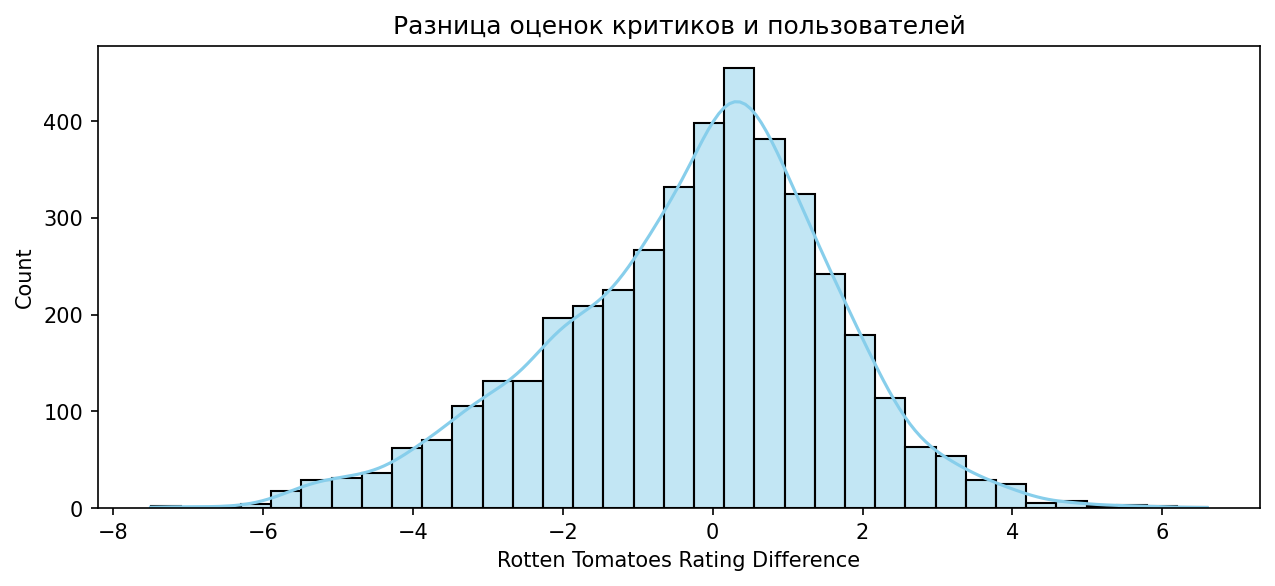

In [24]:
plt.figure(figsize=(10, 4), dpi=150)
sns.histplot(data=dataset, x='Rotten Tomatoes Rating Difference', kde=True, bins=35, color='skyblue')
plt.title("Разница оценок критиков и пользователей")

Выясним:
1. Какие фильмы были оценены лучше критиками и насколько?
2. Какие фильмы были оценены лучше пользователям и насколько?

In [38]:
from tabulate import tabulate

users_top = dataset.nsmallest(3, 'Rotten Tomatoes Rating Difference')[['Movie Name', 'Rotten Tomatoes Rating Difference']]
critics_top = dataset.nlargest(3, 'Rotten Tomatoes Rating Difference')[['Movie Name', 'Rotten Tomatoes Rating Difference']]

print("Высоко оцененные пользователями, но низко оцененные критиками:")
print(tabulate(users_top, headers='keys', tablefmt='pretty', showindex=False))
print("\nВысоко оцененные критиками, но низко оцененные пользователями:")
print(tabulate(critics_top, headers='keys', tablefmt='pretty', showindex=False))


Высоко оцененные пользователями, но низко оцененные критиками:
+----------------------------+-----------------------------------+
|         Movie Name         | Rotten Tomatoes Rating Difference |
+----------------------------+-----------------------------------+
|         Stonewall          |               -7.5                |
|           Grind            |        -7.1000000000000005        |
| Diary of a Mad Black Woman |               -7.0                |
+----------------------------+-----------------------------------+

Высоко оцененные критиками, но низко оцененные пользователями:
+------------+-----------------------------------+
| Movie Name | Rotten Tomatoes Rating Difference |
+------------+-----------------------------------+
| Boundaries |                6.6                |
|    Egg     |                6.0                |
|   Maniac   |         5.800000000000001         |
+------------+-----------------------------------+


## Рейтинги сервиса Metacritic.

Датасет содержит следующий набор данных от данного сервиса:
- Metacritic Users - оценки пользователей.
- Metacritic Critics - оценки критиков.

([<matplotlib.axis.YTick at 0x170cfde0d90>,
 [Text(0, 0, '0'),
  Text(0, 1, '1'),
  Text(0, 2, '2'),
  Text(0, 3, '3'),
  Text(0, 4, '4'),
  Text(0, 5, '5'),
  Text(0, 6, '6'),
  Text(0, 7, '7'),
  Text(0, 8, '8'),
  Text(0, 9, '9'),
  Text(0, 10, '10')])

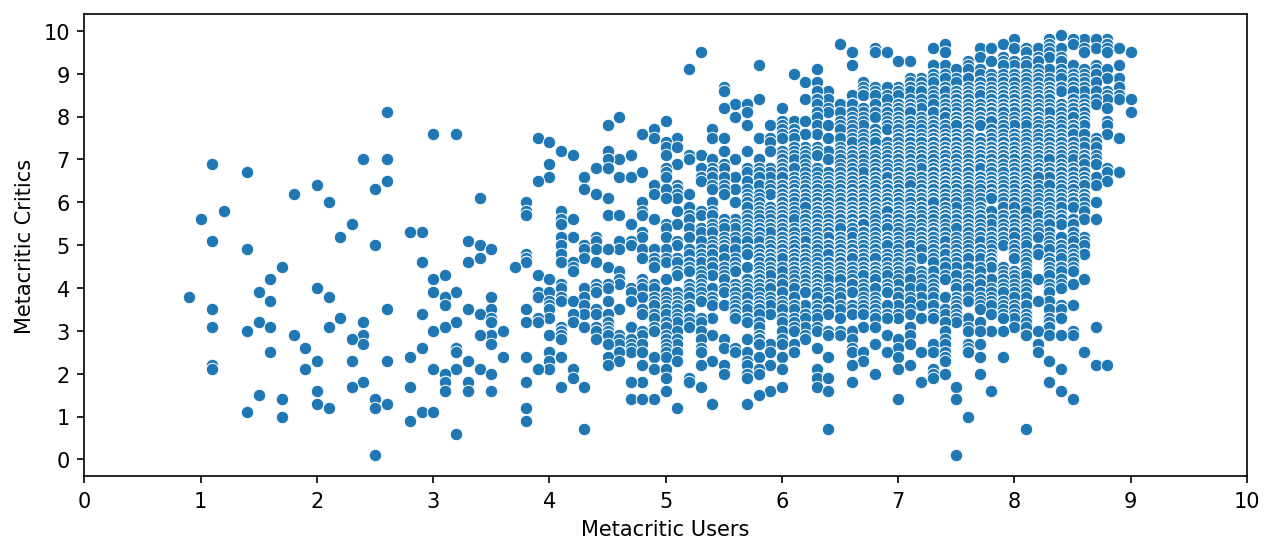

In [26]:
plt.figure(figsize=(10, 4), dpi=150)
sns.scatterplot(data=dataset, x='Metacritic Users', y='Metacritic Critics')
plt.xticks(range(11))
plt.yticks(range(11))

## Рейтинги сервиса IMDB.

Датасет содержит следующий набор данных от данного сервиса:
- IMDB Rating - оценки пользователей.

Построим график, отображающий распределение оценок в сервисе IMDB

Text(-3.6805555555555554, 0.5, 'Плотность')

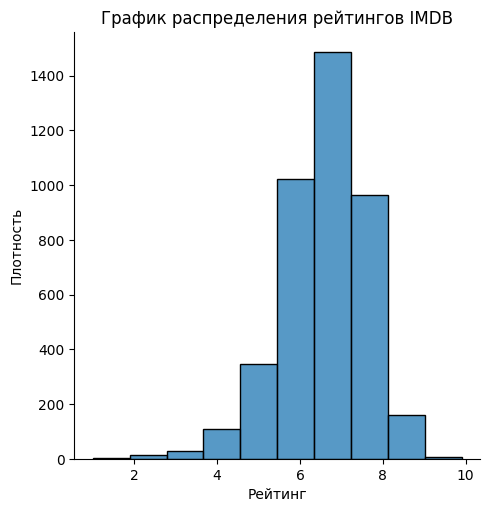

In [27]:
sns.displot(dataset['IMDB Rating'], bins = 10)
plt.title('График распределения рейтингов IMDB')
plt.xlabel('Рейтинг')
plt.ylabel('Плотность')

# ЧАСТЬ 3. СРАВНИТЕЛЬНЫЙ АНАЛИЗ СЕРВИСОВ.

Построим Box Plot, который отображает визуальное представление о распределении рейтингов от различных сервисов

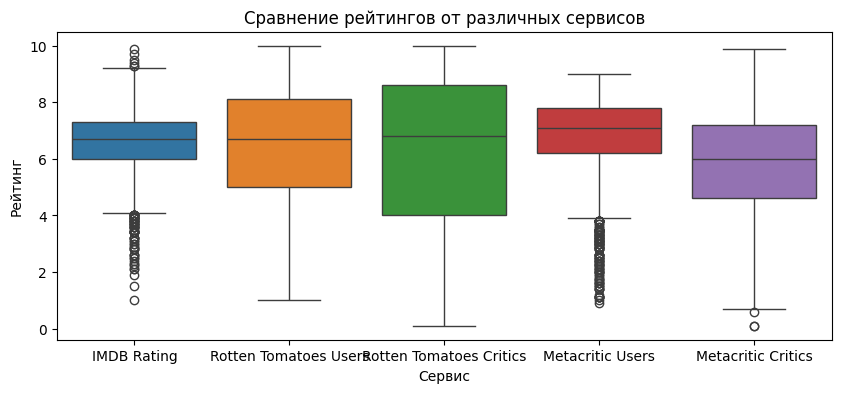

In [28]:
plt.figure(figsize=(10, 4))
sns.boxplot(data=dataset[['IMDB Rating', 'Rotten Tomatoes Users', 'Rotten Tomatoes Critics', 'Metacritic Users', 'Metacritic Critics']])
plt.title('Сравнение рейтингов от различных сервисов')
plt.xlabel('Сервис')
plt.ylabel('Рейтинг')
plt.show()

Попробуем наложить диаграммы рассеивания сервисов Rotten Tomatoes и Metacritic связи оценок полученных от пользователей и оценок полученных от критиков.

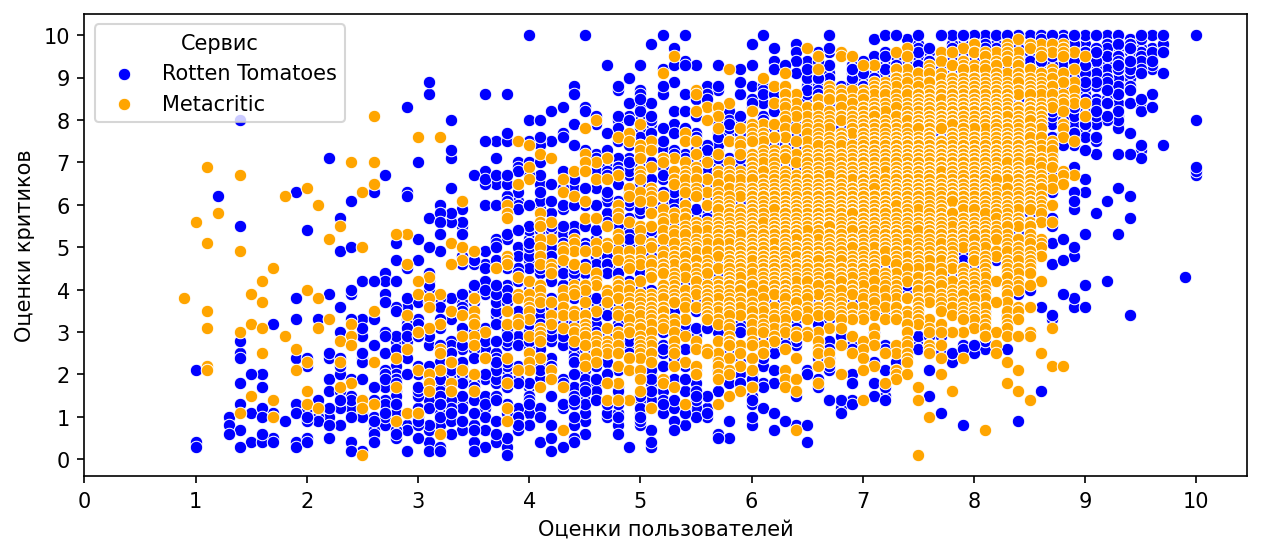

In [29]:
plt.figure(figsize=(10, 4), dpi=150)

sns.scatterplot(data=dataset, x='Rotten Tomatoes Users', y='Rotten Tomatoes Critics', color='blue', label='Rotten Tomatoes')
sns.scatterplot(data=dataset, x='Metacritic Users', y='Metacritic Critics', color='orange', label='Metacritic')

plt.xticks(range(11))
plt.yticks(range(11))
plt.xlabel('Оценки пользователей')
plt.ylabel('Оценки критиков')
plt.legend(title='Сервис')
plt.show()

Из наложения диаграмм видно, что разброс оценок сервиса Metacritic меньше чем у Rotten Tomatoes, значит оценки пользователей и критиков Metacritic гораздо ближе друг к другу.

Построим тепловую карту, цвет каждой ячейки которой отражает степень корреляции между оценками различных сервисов.

c:\Users\rusen\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


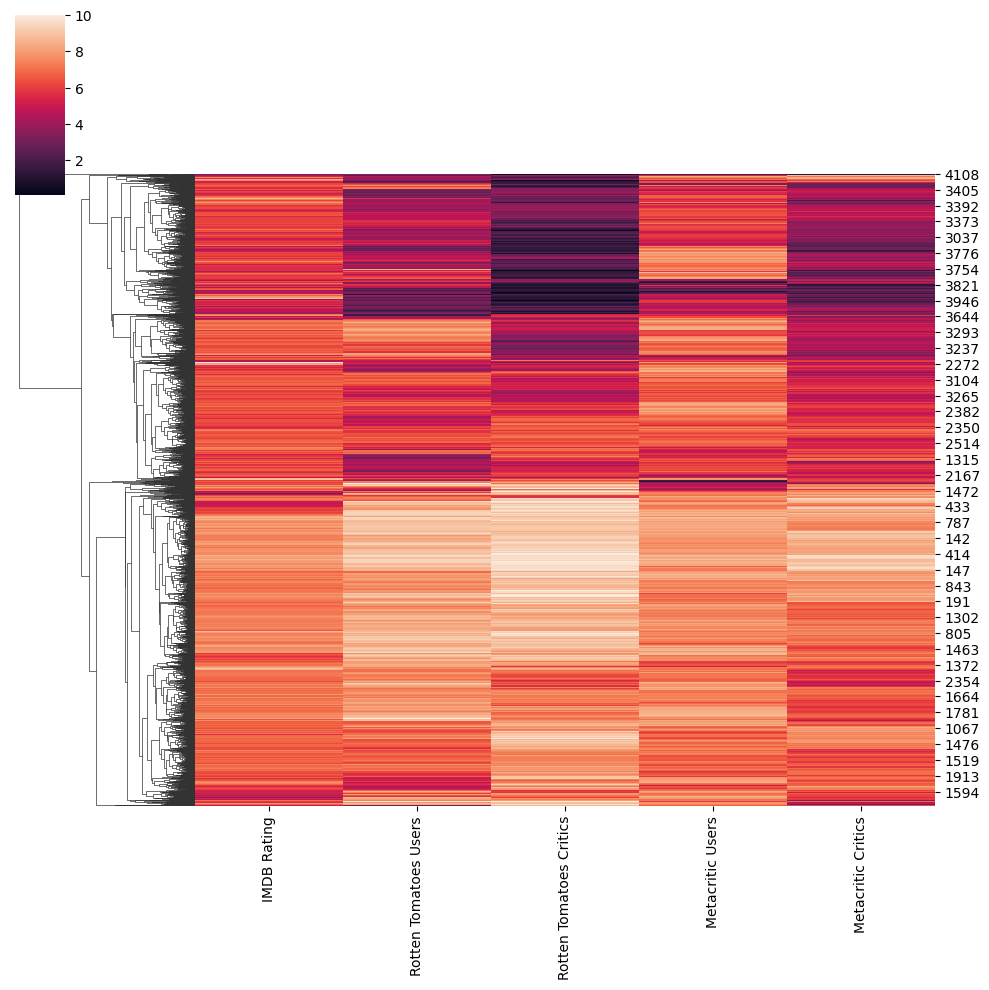

In [30]:
dataset_ratings = dataset[["IMDB Rating","Rotten Tomatoes Users","Rotten Tomatoes Critics","Metacritic Users","Metacritic Critics"]]

dataset_ratings = dataset_ratings.dropna()

sns.clustermap(dataset_ratings,col_cluster=False)

Из тепловой карты видно, что фильмы помеченные критиками сервиса Rotten Tomatoes низкими оценками имеют более высокие значения в других столбцах. А фильмы помеченные более высокими оценками, другие сервисы оценивают более низкими оценками.

Попробуем исследовать это замечание. Давайте посмотрим на топ худших и лучших фильмов по оценке критиков Rotten Tomatoes.

In [35]:
dataset_for_comparison = dataset[["Movie Name","IMDB Rating","Rotten Tomatoes Users","Rotten Tomatoes Critics","Metacritic Users","Metacritic Critics"]]

top_rtc_best = dataset_for_comparison.sort_values(by='Rotten Tomatoes Critics', ascending=False).head(5)
top_rtc_worst = dataset_for_comparison.sort_values(by='Rotten Tomatoes Critics').head(5)

print("\nТоп 5 лучших фильмов по версии Rotten Tomatoes Critics:")
print(tabulate(top_rtc_best[['Movie Name', 'Rotten Tomatoes Critics']], headers='keys', tablefmt='pretty', showindex=False))

print("\nТоп 5 худших фильмов по версии Rotten Tomatoes Critics:")
print(tabulate(top_rtc_worst[['Movie Name', 'Rotten Tomatoes Critics']], headers='keys', tablefmt='pretty', showindex=False))


Топ 5 лучших фильмов по версии Rotten Tomatoes Critics:
+---------------------------+-------------------------+
|        Movie Name         | Rotten Tomatoes Critics |
+---------------------------+-------------------------+
|           Push            |          10.0           |
|        Stagecoach         |          10.0           |
| A Midsummer Night's Dream |          10.0           |
|  Only Angels Have Wings   |          10.0           |
|      Last Train Home      |          10.0           |
+---------------------------+-------------------------+

Топ 5 худших фильмов по версии Rotten Tomatoes Critics:
+-------------------+-------------------------+
|    Movie Name     | Rotten Tomatoes Critics |
+-------------------+-------------------------+
|  Daddy Day Camp   |           0.1           |
|      Twisted      |           0.2           |
|   Baby Geniuses   |           0.2           |
|    Epic Movie     |           0.2           |
| Meet the Spartans |           0.2           

Проверим, как другие сервисы оценивают эти же фильмы.

In [39]:

print("\nЛучшие фильмы по версии Rotten Tomatoes Critics:")
table_of_best = tabulate(dataset_for_comparison.loc[top_rtc_best.index, :], headers='keys', tablefmt='pretty', showindex=False)
print(table_of_best)

print("\nХудшие фильмы по версии Rotten Tomatoes Critics:")
table_of_worst = tabulate(dataset_for_comparison.loc[top_rtc_worst.index, :], headers='keys', tablefmt='pretty', showindex=False)
print(table_of_worst)


Лучшие фильмы по версии Rotten Tomatoes Critics:
+---------------------------+-------------+-----------------------+-------------------------+------------------+--------------------+
|        Movie Name         | IMDB Rating | Rotten Tomatoes Users | Rotten Tomatoes Critics | Metacritic Users | Metacritic Critics |
+---------------------------+-------------+-----------------------+-------------------------+------------------+--------------------+
|           Push            |     6.8     |          8.3          |          10.0           |       6.9        |        3.6         |
|        Stagecoach         |     7.8     |          8.6          |          10.0           |       7.6        |        9.3         |
| A Midsummer Night's Dream |     5.6     |          6.7          |          10.0           |       8.4        |        6.7         |
|  Only Angels Have Wings   |     7.6     |          8.2          |          10.0           |       7.4        |        8.6         |
|      Last 

Как видно из таблицы, разница между фильмами оцененными Rotten Tomatoes Critics и другими сервисами очень большая. Фильмы, которые были оценены критиками сервиса Rotten Tomatoes низкими оценками, на других сервисах получили больший успех. И наоборот, фильмы с высокими оценками, получили на других сервисах более низкий результат.

Такая большая разница может свидетельствовать о:
1. намеренном завышении или занижении рейтингов фильмов
2. некомпетентности кинокритиков сервиса
3. неточности данных в датасете.